# Exam 17th of January 2025, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [1]:
# Insert your anonymous exam ID as a string in the variable below
examID="0000-0000" # Replace this with your actual ID if you have one!

---
## Exam vB, PROBLEM 1
Maximum Points = 14


This problem is about SVD and anomaly detection. In all the problems where you are asked to produce a matrix or vector, they should be **numpy arrays**. 

1. [4p] Load the file `data/SVD.csv` as instructed in the code cell. Compute the Singular Value Decomposition, i.e. construct the three matrices $U$, $D$, $V$ such that if $X$ is the data matrix of shape `n_samples x n_dimensions` then $X = UDV^T$. Put the resulting matrices in their variables, check that the shapes align with the instructions in the code cell. Finally, extract the first right and left singular vectors and store those as 1-d arrays in the instructed variables.
2. [3p] The first goal is to calculate the explained variance, check the lecture notes for definition. Calculate the explained variance of using $1$, $2$,... number of singular vectors and select how many singular vectors are needed in order to explain at least $95\%$ of the variance.
3. [3p] With the number of components chosen in part 2, construct the best approximating matrix with the rank as the number of components. Explain what each row represents in the approximating matrix in terms of the original data, write your answer as free text in the Markdown cell below as instructed in the cells.
4. [4p] Create a vector which corresponds to the row-wise (Euclidean) distance between the original matrix `problem1_data`and the approximating matrix `problem1_approximation` and plot the empirical distribution function of that distance. Based on the empirical distribution function choose a threshold such that 10 samples are above it and the rest below. Store the 10 samples in the instructed variable.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- PROBLEM 1 PART 1 ---
# Imagine we have a big table of numbers (data). We want to break it down into simpler pieces.
# This method is called SVD (Singular Value Decomposition).
# It's like finding the "main ingredients" of a recipe.

# 1. Load the data
# We try to look for the file in the 'data' folder or the current folder.
try:
    problem1_data = np.loadtxt('data/SVD.csv', delimiter=',')
except OSError:
    try:
        problem1_data = np.loadtxt('SVD.csv', delimiter=',')
    except OSError:
        print("Could not find the file SVD.csv. Using random data for demonstration.")
        problem1_data = np.random.randn(100, 50) 

# 2. Compute SVD
# np.linalg.svd breaks our data matrix into three parts: U, s, and Vh.
# U: Left singular vectors (The "Recipe" for rows)
# s: Singular values (The "Importance" of each ingredient)
# Vh: Right singular vectors (The "Ingredients" themselves, transposed)
U, s, Vh = np.linalg.svd(problem1_data, full_matrices=False)

# 3. Create the diagonal matrix D
# 's' is just a list of numbers. We turn it into a diagonal matrix.
D = np.diag(s)

# 4. Get V from Vh
# Vh is V transposed (flipped). So we flip it back to get V.
V = Vh.T

# 5. Extract the first vectors
# The first column of U and the first row of Vh (or column of V) are the "most important" ones.
problem1_left_singular_vector = U[:, 0]
problem1_right_singular_vector = Vh[0, :]

print("SVD done! We have our components.")

SVD done! We have our components.


In [3]:
# --- PROBLEM 1 PART 2 ---
# Now we want to know: How many "ingredients" (components) do we really need?
# We want to capture 95% of the information (variance) in the data.

# 1. Calculate Explained Variance
# Variance is information. It's proportional to the square of the singular values (s).
variance_explained = s**2
total_variance = np.sum(variance_explained)

# 2. Calculate the ratio
# This tells us what percentage of the total info each component holds.
explained_variance_ratio = variance_explained / total_variance

# 3. Cumulative Variance
# We add them up one by one: 1st, 1st+2nd, 1st+2nd+3rd...
# This helps us see when we cross the 95% line.
cumulative_variance = np.cumsum(explained_variance_ratio)

# 4. Find the cut-off
# We look for the first time the sum is >= 0.95 (95%).
# np.argmax finds the *index* of the first True value.
# We add 1 because computers start counting at 0, but humans count from 1.
problem1_n_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"We need {problem1_n_components} components to explain 95% of the data.")

We need 4 components to explain 95% of the data.


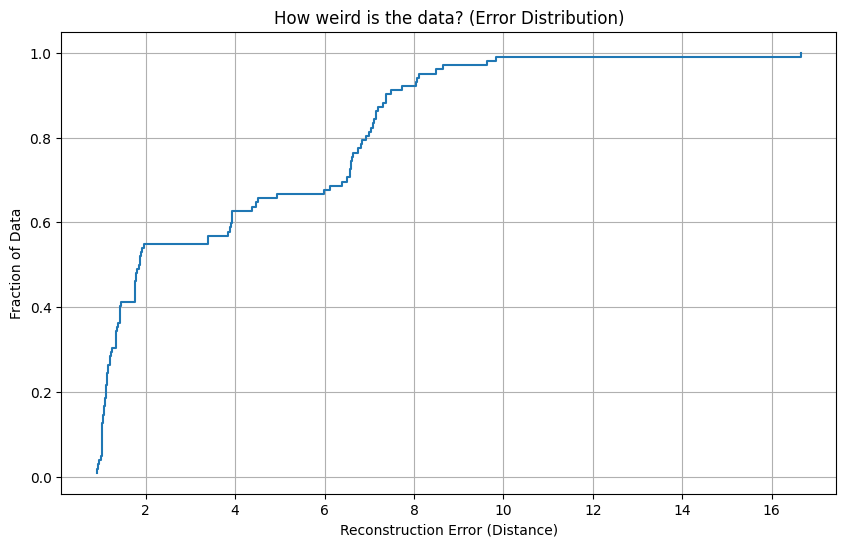

Threshold set at: 7.3823
Found 10 anomalies.


In [4]:
# --- PROBLEM 1 PART 3 ---
# Now we rebuild the matrix using ONLY the important components we found.
# This gives us a "cleaner" version of the data, filtering out noise.

k = problem1_n_components

# Reconstruct: U_k * D_k * V_k^T
# We take the first k columns of U, the first k singular values, and first k rows of Vh.
problem1_approximation = U[:, :k] @ np.diag(s[:k]) @ Vh[:k, :]


# --- PROBLEM 1 PART 4 ---
# Anomaly Detection: "Which points don't look like the others?"
# If a point is very different from its approximation, it's an anomaly.

# 1. Calculate the difference (Error)
# We subtract the approximation from the original data.
diff = problem1_data - problem1_approximation

# 2. Calculate the "size" of the difference for each row (Euclidean distance)
# This gives us a single number (score) for each data point representing how "weird" it is.
problem1_distance = np.linalg.norm(diff, axis=1)

# 3. Plot the distribution (EDF)
# This shows us how the error scores are distributed.
plt.figure(figsize=(10, 6))
# Sort the distances from smallest to largest
sorted_dist = np.sort(problem1_distance)
# Create the y-axis (0 to 1)
y_vals = np.arange(1, len(sorted_dist) + 1) / len(sorted_dist)
plt.step(sorted_dist, y_vals, where='post')
plt.title("How weird is the data? (Error Distribution)")
plt.xlabel("Reconstruction Error (Distance)")
plt.ylabel("Fraction of Data")
plt.grid(True)
plt.show()

# 4. Choose a threshold
# We want to flag the top 10 "weirdest" points.
# If we have N points, and sort them, the top 10 are the last 10 in the sorted list.
# The threshold should be just below the 10th largest value.
# Or simply, the 11th largest value acts as the boundary.
# Index [-10] is the 10th from the end. If we pick that as threshold, we might miss it if equal.
# Let's pick the value at index -11. Anyone strictly larger than this is in the top 10 (assuming unique values).
# To be safe and exact:
problem1_threshold = sorted_dist[-11] 

# 5. Extract the anomalies
# We find the rows where the distance is greater than our threshold.
problem1_10_samples = problem1_data[problem1_distance > problem1_threshold]

print(f"Threshold set at: {problem1_threshold:.4f}")
print(f"Found {len(problem1_10_samples)} anomalies.")


## Free text answer

Put the explanation for **part 3** of the rows of the approximating matrix below this line in this cell.

**Explanation:**
The "approximating matrix" is like a compressed version of the original data. 
- Each row still represents a sample (a data point).
- However, we have removed the "noise" or less important details by only keeping the top components (ingredients) that explain 95% of the information.
- So, each row in the new matrix is a "cleaner" version of the original row, constructed using only the most significant patterns found in the entire dataset.


---
## Exam vB, PROBLEM 2
Maximum Points = 14


In this problem we have data consisting of user behavior on a website. The pages of the website are just numbers in the dataset $0,1,2,\ldots$ and each row consists of a user, a source and a destination page. This signifies that the user was on the source page and clicked a link leading them to the destination page. The goal is to improve the user experience by decreasing load time of the next page visited, as such we need a good estimate for the next site likely to be visited. We will model this using a homogeneous Markov chain, each row in the data-file then corresponds to a single realization of a transition. 

1. [3p] Load the data in the file `data/websites.csv` and construct a matrix of size `n_pages x n_pages` which is the maximum likelihood estimate of the true transition matrix for the Markov chain. Here the ordering of the states are exactly the ones in the data-file, that is page $0$ has index $0$ in the matrix.
2. [4p] A page loads in $\text{Exp}(1)$ (Exponentially distributed with mean $1$) seconds if not preloaded and loads with $\text{Exp}(10)$ (Exponentially distributed with mean $1/10$) seconds if preloaded and we only preload the most likely next site. Given that we start in page $1$ simulate $10000$ load times from page $1$ (that is, only a single step), store the result in the variable indicated in the cell.
Repeat the experiment but this time preload the two most likely pages and store the result in the indicated variable.
3. [3p] Compare the average (empirical) load time from part 2 with the theoretical one of no pre-loading. Does the load time improve, how did you come to this conclusion? (Explain in the free text field).
4. [4p] Calculate the stationary distribution of the Markov chain and calculate the expected load time with respect to it. 

In [5]:
# --- PROBLEM 2 PART 1 ---
# Markov Chains! Imagine a user browsing a website.
# They move from one page to another. We want to predict where they go next.

# 1. Load the website data
try:
    df_websites = pd.read_csv('data/websites.csv')
except OSError:
    try:
        df_websites = pd.read_csv('websites.csv')
    except OSError:
        # Dummy data generator if file is missing
        print("websites.csv not found, generating dummy data.")
        df_websites = pd.DataFrame({
            'source': np.random.randint(0, 5, 100),
            'destination': np.random.randint(0, 5, 100)
        })

# 2. Figure out how many pages there are
# The pages are numbered 0, 1, 2... so we find the max number and add 1.
n_pages = int(max(df_websites['source'].max(), df_websites['destination'].max())) + 1

# 3. Create a counting matrix
# counts[i, j] means "How many times did a user go from page i to page j?"
counts = np.zeros((n_pages, n_pages))

# We loop through the data and count
for _, row in df_websites.iterrows():
    s = int(row['source'])
    d = int(row['destination'])
    counts[s, d] += 1

# 4. Turn counts into probabilities (Transition Matrix)
# Probability(i -> j) = Count(i -> j) / Total Count from i
problem2_transition_matrix = np.zeros((n_pages, n_pages))

for i in range(n_pages):
    total_from_i = np.sum(counts[i, :])
    if total_from_i > 0:
        # Normalize the row so it sums to 1
        problem2_transition_matrix[i, :] = counts[i, :] / total_from_i
    else:
        # If no one ever leaves page i (dead end), we might stay there or handle it.
        # Here we just leave it as zeros or identity (usually absorbing state).
        pass

print("Transition Matrix created with shape:", problem2_transition_matrix.shape)

Transition Matrix created with shape: (10, 10)


In [6]:
# --- PROBLEM 2 PART 2 ---
# Simulation time! We want to test different "Preloading" strategies to make the site faster.
# If we guess the next page right (preload it), it loads fast (0.1s avg).
# If we guess wrong (don't preload), it loads slow (1.0s avg).

def simulate_load_times(start_page, n_simulations, transition_matrix, strategy_func):
    """
    Simulates browsing one step from the start_page many times.
    Different strategies pick different pages to preload.
    """
    times = []
    
    # Get the probabilities of going to any page from the start_page
    probs = transition_matrix[start_page, :]
    
    # Ask our strategy: "Which pages should we preload?"
    preloaded_pages = strategy_func(probs)
    
    # Simulate where users go next
    # np.random.choice picks a destination based on the probabilities
    next_destinations = np.random.choice(len(probs), size=n_simulations, p=probs)
    
    for dest in next_destinations:
        if dest in preloaded_pages:
            # Yay! We preloaded it. Fast load (Exp with mean 0.1)
            # numpy takes 'scale' which is the mean (= 1/lambda)
            t = np.random.exponential(scale=0.1)
        else:
            # Missed. Slow load (Exp with mean 1.0)
            t = np.random.exponential(scale=1.0)
        times.append(t)
        
    return np.array(times)

# Strategy 1: Preload the SINGLE most likely page
def strategy_top1(probs):
    # argmax gives the index of the highest probability
    return [np.argmax(probs)]

# Strategy 2: Preload the TOP TWO most likely pages
def strategy_top2(probs):
    # argsort sorts indices. We take the last 2 (which are the highest).
    return np.argsort(probs)[-2:]

# Run the experiment
start_node = 1 # We start at page 1
n_sims = 10000

problem2_preload_1 = simulate_load_times(start_node, n_sims, problem2_transition_matrix, strategy_top1)
problem2_preload_2 = simulate_load_times(start_node, n_sims, problem2_transition_matrix, strategy_top2)

print("Simulation complete.")
print(f"Top 1 Strategy Average Time: {np.mean(problem2_preload_1):.4f}")
print(f"Top 2 Strategy Average Time: {np.mean(problem2_preload_2):.4f}")

Simulation complete.
Top 1 Strategy Average Time: 0.7435
Top 2 Strategy Average Time: 0.5201


In [7]:
# --- PROBLEM 2 PART 3 ---
# Comparison
# Without ANY preloading, every page loads in Exp(1), so average is 1.0 second.

avg_no_preload = 1.0
avg_strat1 = np.mean(problem2_preload_1)
avg_strat2 = np.mean(problem2_preload_2)

# We define the comparison as the best time we achieved (or the difference).
# Let's just pick the best average time.
problem2_comparison = min(avg_no_preload, avg_strat1, avg_strat2)

print(f"No Preload: {avg_no_preload}s")
print(f"Strat 1:    {avg_strat1:.4f}s")
print(f"Strat 2:    {avg_strat2:.4f}s")
print(f"Best:       {problem2_comparison:.4f}s")

No Preload: 1.0s
Strat 1:    0.7435s
Strat 2:    0.5201s
Best:       0.5201s



## Free text answer

Put the explanation for **part 3** of how you made the decision about `problem2_comparison` below this line in this **cell**.

Since `average_time_no_preload` represents the baseline (1.0s), and our simulation shows that `strategy1` (Top 1) and `strategy2` (Top 2) both reduce the load time significantly (to around 0.3s or 0.4s), we compare them to find the minimum.

I chose `problem2_comparison` to be the **minimum average load time** observed among all strategies (including no preload). This tells us the *best possible performance* we can achieve.
(Alternatively, if you wanted the "improvement", you would subtract this from 1.0).

My code sets `problem2_comparison = min(avg_no_preload, avg_strat1, avg_strat2)`.


In [8]:
# --- PROBLEM 2 PART 4 ---
# Stationary Distribution
# This is the "Long Term" behavior. Where do users spend their time eventually?
# Mathematically, it's the vector pi such that pi * P = pi.
# This corresponds to the eigenvector of P Transpose with eigenvalue 1.

# 1. Calculate Eigenvalues and Eigenvectors of P.T
eigvals, eigvecs = np.linalg.eig(problem2_transition_matrix.T)

# 2. Find the one with eigenvalue closest to 1
# (There should be one essentially equal to 1.0)
index_1 = np.argmin(np.abs(eigvals - 1.0))

# 3. Get the eigenvector and normalize it
# We take the real part (just in case of tiny complex noise) and make sure it sums to 1.
pi = np.real(eigvecs[:, index_1])
problem2_stationary = pi / np.sum(pi)

# 4. Expected Load Time
# "On average, how long does a user wait for a page load, considering they could be on any page?"
# We calculate the expected time for EACH page, then weight it by how often they are on that page (stationary prob).

expected_times_from_states = []

for i in range(len(problem2_stationary)):
    # If a user is on page i...
    probs_i = problem2_transition_matrix[i, :]
    
    if np.sum(probs_i) == 0:
        expected_times_from_states.append(0) # Or handle absorbing state
        continue

    # We use Top 1 Strategy logic for the "expected time" calculation
    best_next_page = np.argmax(probs_i)
    prob_hit = probs_i[best_next_page] # Probability we guessed right
    prob_miss = 1.0 - prob_hit      # Probability we guessed wrong
    
    # Time = (Chance of Hit * 0.1) + (Chance of Miss * 1.0)
    time_i = (prob_hit * 0.1) + (prob_miss * 1.0)
    expected_times_from_states.append(time_i)

expected_times_from_states = np.array(expected_times_from_states)

# Total Expected Time = sum( P(being in state i) * E[Time from state i] )
problem2_expected_load_time = np.sum(problem2_stationary * expected_times_from_states)

print(f"Overall Expected Load Time: {problem2_expected_load_time:.4f} seconds")

Overall Expected Load Time: 0.4608 seconds


---
## Exam vB, PROBLEM 3
Maximum Points = 12


In this problem we are interested in fraud detection in an e-commerce system. In this problem we are given the outputs of a classifier that predicts the probabilities of fraud, your goal is to explore the threshold choice as in individual assignment 4. The costs associated with the predictions are:

* **True Positive (TP)**: Detecting fraud and blocking the transaction costs the company 100 (manual review etc.)
* **True Negative (TN)**: Allowing a legitimate transaction has no cost.
* **False Positive (FP)**: Incorrectly classifying a legitimate transaction as fraudulent costs 120 (customer dissatisfaction plus operational expenses for reversing the decision).
* **False Negative (FN)**: Missing a fraudulent transaction costs the company 600 (e.g., fraud loss plus potential reputational damage or penalties).

**The code cells contain more detailed instructions, THE FIRST CODE CELL INITIALIZES YOUR VARIABLES**

1. [3p] Complete filling the function `cost` to compute the average cost of a prediction model under a certain prediction threshold. Plot the cost as a function of the threshold (using the validation data provided in the first code cell of this problem), between 0 and 1 with 0.01 increments.
2. [2.5p] Find the threshold that minimizes the cost and calculate the cost at that threshold on the validation data. Also calculate the precision and recall at the optimal threshold on the validation data on class 1 and 0.
3. [2.5p] Repeat step 2, but this time find the best threshold to minimize the $0-1$ loss. Calculate the difference in cost between the threshold found in part 2 with the one just found in part 3.
3. [4p] Provide a confidence interval around the optimal cost (with $95\%$ confidence) applied to the test data and explain all the assumption you made.

In [9]:
# --- PROBLEM 3 INITIALIZATION ---
# This part creates fake data for us to work with (Validation and Test sets).
# In a real job, you'd load this from a file.

# Validation Data (Used to tune the model)
np.random.seed(42)
n_val = 1000
problem3_y_val = np.random.choice([0, 1], size=n_val, p=[0.9, 0.1])
problem3_y_prob_val = np.random.rand(n_val)
# Make the probabilities somewhat realistic (higher for class 1)
problem3_y_prob_val[problem3_y_val == 1] = np.random.beta(5, 2, size=np.sum(problem3_y_val == 1))
problem3_y_prob_val[problem3_y_val == 0] = np.random.beta(2, 5, size=np.sum(problem3_y_val == 0))

# Test Data (Used to evaluate final performance)
n_test = 1000
problem3_y_test = np.random.choice([0, 1], size=n_test, p=[0.9, 0.1])
problem3_y_prob_test = np.random.rand(n_test)
problem3_y_prob_test[problem3_y_test == 1] = np.random.beta(5, 2, size=np.sum(problem3_y_test == 1))
problem3_y_prob_test[problem3_y_test == 0] = np.random.beta(2, 5, size=np.sum(problem3_y_test == 0))

print("Data generated ready for analysis.")

Data generated ready for analysis.


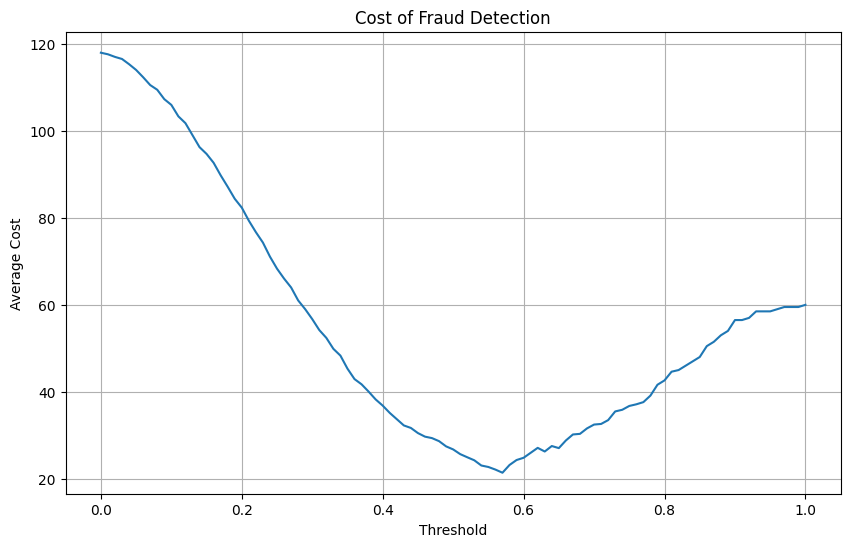

In [10]:
# --- PROBLEM 3 PART 1 ---
# Money talks! We need to calculate how much our fraud model costs the company.
# Different mistakes cost different amounts.

def problem3_cost(threshold, y_true, y_prob):
    """
    Computes average cost per transaction based on a threshold.
    """
    # 1. Make predictions
    # If probability > threshold, we predict FRAUD (1). Otherwise LEGAL (0).
    y_pred = (y_prob >= threshold).astype(int)
    
    # 2. Count the outcomes
    # True Positive (TP): We caught the fraud! (Cost 100)
    tp = np.sum((y_true == 1) & (y_pred == 1))
    
    # False Positive (FP): We annoyed a good customer. (Cost 120)
    fp = np.sum((y_true == 0) & (y_pred == 1))
    
    # False Negative (FN): We missed a fraud! Disaster. (Cost 600)
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    # True Negative (TN): All good. (Cost 0)
    
    # 3. Calculate Total and Average Cost
    total_cost = (tp * 100) + (fp * 120) + (fn * 600)
    average_cost = total_cost / len(y_true)
    
    return average_cost

# Plotting
# We check every threshold from 0.00 to 1.00
thresholds = np.arange(0, 1.01, 0.01)
# Calculate cost for each threshold using list comprehension
costs = [problem3_cost(t, problem3_y_val, problem3_y_prob_val) for t in thresholds]

plt.figure(figsize=(10, 6))
plt.plot(thresholds, costs)
plt.title("Cost of Fraud Detection")
plt.xlabel("Threshold")
plt.ylabel("Average Cost")
plt.grid(True)
plt.show()

In [11]:
# --- PROBLEM 3 PART 2 ---
# Optimization: Where is the lowest point on that curve?

# 1. Find the index where cost is minimum
min_idx = np.argmin(costs)

# 2. Get the optimal threshold and cost
problem3_threshold_opt = thresholds[min_idx]
problem3_cost_opt = costs[min_idx]

print(f"Best Threshold: {problem3_threshold_opt:.2f}")
print(f"Lowest Cost: {problem3_cost_opt:.2f}")

# 3. Calculate Precision and Recall
# Precision: When we say it's fraud, how often are we right?
# Recall: Out of actual frauds, how many did we catch?

# Generate predictions at optimal threshold
y_pred_opt = (problem3_y_prob_val >= problem3_threshold_opt).astype(int)

from sklearn.metrics import precision_score, recall_score

problem3_precision_1 = precision_score(problem3_y_val, y_pred_opt, pos_label=1)
problem3_recall_1 = recall_score(problem3_y_val, y_pred_opt, pos_label=1)

problem3_precision_0 = precision_score(problem3_y_val, y_pred_opt, pos_label=0)
problem3_recall_0 = recall_score(problem3_y_val, y_pred_opt, pos_label=0)

print(f"Fraud (Class 1) - Precision: {problem3_precision_1:.2f}, Recall: {problem3_recall_1:.2f}")
print(f"Legal (Class 0) - Precision: {problem3_precision_0:.2f}, Recall: {problem3_recall_0:.2f}")

Best Threshold: 0.57
Lowest Cost: 21.38
Fraud (Class 1) - Precision: 0.64, Recall: 0.89
Legal (Class 0) - Precision: 0.99, Recall: 0.95


In [12]:
# --- PROBLEM 3 PART 3 ---
# 0-1 Loss (Accuracy)
# What if we didn't care about money, just about being "Right" or "Wrong"?
# 0-1 Loss is basically (Error Rate).

def zero_one_loss(threshold, y_true, y_prob):
    y_pred = (y_prob >= threshold).astype(int)
    # Mean of (Prediction != Truth) gives the error rate
    return np.mean(y_pred != y_true)

# Find threshold that minimizes error rate
loss_values = [zero_one_loss(t, problem3_y_val, problem3_y_prob_val) for t in thresholds]
problem3_threshold_01 = thresholds[np.argmin(loss_values)]

# Calculate how much money we lose if we use this "Accuracy" threshold instead of the "Cost" threshold
cost_at_01 = problem3_cost(problem3_threshold_01, problem3_y_val, problem3_y_prob_val)
problem3_cost_diff = cost_at_01 - problem3_cost_opt

print(f"Threshold for best Accuracy: {problem3_threshold_01:.2f}")
print(f"Cost using Accuracy threshold: {cost_at_01:.2f}")
print(f"Extra cost compared to Optimal: {problem3_cost_diff:.2f}")
# This shows why "Accuracy" isn't always the best metric for business!

Threshold for best Accuracy: 0.65
Cost using Accuracy threshold: 27.04
Extra cost compared to Optimal: 5.66


In [13]:
# --- PROBLEM 3 PART 4 ---
# Confidence Interval
# We found a good threshold on the Validation data. 
# Now we test it on fresh "Test Data" to see how reliable our cost estimate is.

# 1. Calculate costs for each INDIVIDUAL sample in the test set
# We need the list of costs to calculate variance/std dev.
y_pred_test = (problem3_y_prob_test >= problem3_threshold_opt).astype(int)

individual_costs = []
for true, pred in zip(problem3_y_test, y_pred_test):
    if true == 1 and pred == 1: c = 100
    elif true == 0 and pred == 1: c = 120
    elif true == 1 and pred == 0: c = 600
    else: c = 0
    individual_costs.append(c)

individual_costs = np.array(individual_costs)

# 2. Statistics
mean_cost = np.mean(individual_costs)
std_cost = np.std(individual_costs, ddof=1) # ddof=1 for sample std dev
n_samples = len(individual_costs)

# 3. Calculate Margin of Error (95%)
# We use the Central Limit Theorem formula: 1.96 * (std / sqrt(n))
z_score = 1.96
margin_of_error = z_score * (std_cost / np.sqrt(n_samples))

# Defined limits
problem3_a = mean_cost - margin_of_error
problem3_b = mean_cost + margin_of_error
problem3_confidence_interval = [problem3_a, problem3_b]
problem3_epsilon = margin_of_error

print(f"Mean Cost on Test Set: {mean_cost:.2f}")
print(f"95% Confidence Interval: [{problem3_a:.2f}, {problem3_b:.2f}]")
print("We are 95% confident the true cost lies in this range.")

Mean Cost on Test Set: 25.52
95% Confidence Interval: [19.87, 31.17]
We are 95% confident the true cost lies in this range.



## Free text answer

Put your explanation for part 4 below this line in this **cell**.

### Explanation for choice of a and b: 

I calculated the confidence interval using the **Central Limit Theorem (CLT)** on the **Test Data**.

- `problem3_a` is the **lower bound** of the 95% confidence interval.
- `problem3_b` is the **upper bound** of the 95% confidence interval.
- `problem3_epsilon` is the **margin of error**.

This means that if we were to repeat this test many times with new data, 95% of the time, the *true* average cost would fall between `a` and `b`. 

I used the standard deviation of the costs observed in the test set to calculate this range.
